<a href="https://colab.research.google.com/github/nikolimaj/text_mining/blob/main/Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading our data

For the following exercise we will use the word count matrix representation and only use a small subset of our data since we will implement a naiveBayes classifier - which is a "lazy learner" and so predictions will be rather slow.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import itertools
import kagglehub

### Reading data from path

In [3]:
path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shanegerami/ai-vs-human-text/versions/1


### Splitting data into a training dataset and a test dataset

In [4]:
data = pd.read_csv(path + "/AI_Human.csv")

# only use small sample of data
data = data.sample(frac = 0.01)

train, test = train_test_split(data, test_size = 0.35)
print(train.shape)
print(test.shape)
train.head()

(3166, 2)
(1706, 2)


,text,generated
119899,"As a language model AI, I do not have a person...",1.0
385170,Dr. Paul Beckman is the creator of the FACS wh...,0.0
17084,The best way of work.\n\nOne question has been...,0.0
277033,"Dear [State Senator’s Name],\n\nI am writing ...",1.0
251286,"As a senior in CIC school, I believe that driv...",1.0


### Creating the word count matrices

Notice that we will not fit_transform the test data but apply the same transformation that we use for the training data.

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
text_train = train["text"]
y_train = train["generated"]
text_test = test["text"]
y_test = test["generated"]

from nltk.corpus import stopwords as nltkStopwords
from sklearn.feature_extraction.text import CountVectorizer

stopwords_en = list(nltkStopwords.words("english"))
count_vectorizer = CountVectorizer(strip_accents = "unicode",
                                   stop_words = stopwords_en)

X_train = count_vectorizer.fit_transform(text_train)
X_test = count_vectorizer.transform(text_test)
counts_features_names = count_vectorizer.get_feature_names_out()
print(X_train.shape)
print(X_test.shape)
print(counts_features_names.shape)

counts_train = pd.DataFrame(X_train.A, columns = counts_features_names)
counts_test = pd.DataFrame(X_test.A, columns = counts_features_names)

(3166, 20829)
(1706, 20829)
(20829,)


### Use the following function to plot confusion matrices of the predictions

In [7]:
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion matrix", cmap = plt.cm.Blues):

    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim(len(cm) - 0.5, -0.5)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    return cm

# **Classification**

In [8]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(counts_train, y_train)

MultinomialNB()

### Evaluate your implementation on the training data...

In [9]:
pred_train = NB.predict(counts_train)

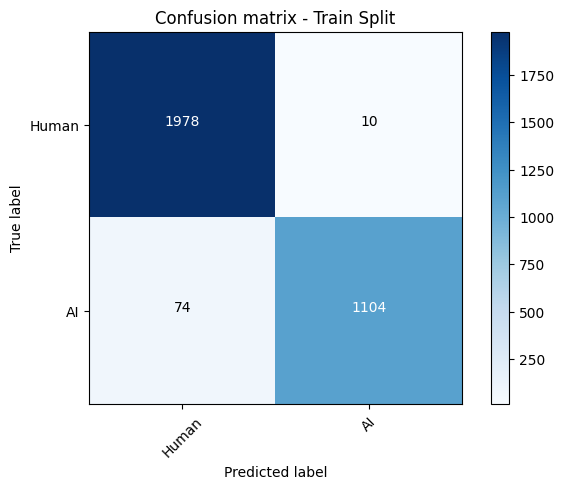

In [11]:
conf = confusion_matrix(y_train, pred_train)

plt.figure()
plot = plot_confusion_matrix(conf, classes = ["Human", "AI"], title = "Confusion matrix - Train Split")
plt.show()

In [12]:
print("Train Accuracy: ", accuracy_score(y_train, pred_train))

Train Accuracy:  0.9734680985470625


### ...and on the test data

In [13]:
pred_test = NB.predict(counts_test)

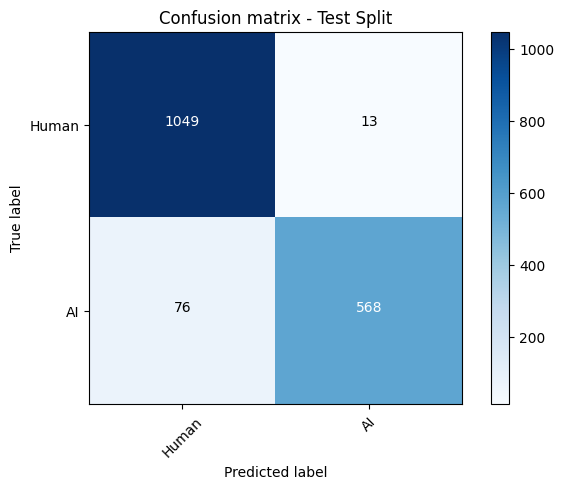

In [14]:
conf = confusion_matrix(y_test, pred_test)

plt.figure()
plot = plot_confusion_matrix(conf, classes = ["Human", "AI"], title = "Confusion matrix - Test Split")
plt.show()

In [15]:
print("Test Accuracy: ", accuracy_score(y_test, pred_test))

Test Accuracy:  0.947831184056272


### What can you observe?

Does it work well? What does accuracy in this context mean given that we have four balanced classes (and we assume that our sample is truly random)? What could be pitfalls why the classifier doesn't work well?